# Historical Weather Comparison (Bogota vs. Chia, Colombia) 

The following notebook create a visual representation of he mean of the temperature of the City of Bogota during 10 years contrastes with the temperature of the 2019 to stablish a comparison with the temperature of a nearby city called Chia, which is well known for being colder. 

Weather data is taken from https://www.renewables.ninja/

Created by Cristian C. Velandia C. 
for the course Applied Plotting, Charting & Data Representation in Python (Coursera)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#%matplotlib notebook

plt.style.use('seaborn-ticks');

"""['grayscale',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-pastel',
 'classic',
 'seaborn-muted',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-poster',
 'ggplot',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-notebook',
 'bmh',
 'seaborn-talk',
 'fivethirtyeight',
 'seaborn']"""

"['grayscale',\n 'seaborn-colorblind',\n 'seaborn-bright',\n 'seaborn-deep',\n 'seaborn-pastel',\n 'classic',\n 'seaborn-muted',\n 'seaborn-darkgrid',\n 'seaborn-white',\n 'seaborn-paper',\n 'seaborn-dark',\n 'seaborn-whitegrid',\n 'dark_background',\n 'seaborn-poster',\n 'ggplot',\n 'seaborn-ticks',\n 'seaborn-dark-palette',\n 'seaborn-notebook',\n 'bmh',\n 'seaborn-talk',\n 'fivethirtyeight',\n 'seaborn']"

In [26]:
# Line plot showing daily mean temperatures

# Load data files 

def DataProcessing(name):
    Df = pd.read_csv(name, skiprows = 3)
    Df['time'] = pd.DatetimeIndex(Df['time'])
    Df = Df.set_index('time')
    
    Data = Df.loc[:,'temperature']
    
    return Data

Bdata = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected (6).csv')
Bdata1 = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected (5).csv')
Bdata2 = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected (4).csv')
Bdata3 = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected (3).csv')
Bdata4 = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected (2).csv')
Bdata5 = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected (1).csv')
Bdata6 = DataProcessing('ninja_weather_4.7054_-74.0541_uncorrected.csv')

Cdata = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected (6).csv')
Cdata1 = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected (5).csv')
Cdata2 = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected (4).csv')
Cdata3 = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected (3).csv')
Cdata4 = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected (2).csv')
Cdata5 = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected (1).csv')
Cdata6 = DataProcessing('ninja_weather_4.8645_-74.0482_uncorrected.csv')

#------------------------ Setup the data sets ------------------------
# Bogota Data sets
Bdata6.drop(Bdata6.index[Bdata6.index=='02-29'], inplace=True)
Bogota19Max = Bdata6.groupby(Bdata6.index.strftime('%m-%d')).max()
Bogota19Min = Bdata6.groupby(Bdata6.index.strftime('%m-%d')).min()

Bogota5y = Bdata.append(Bdata1).append(Bdata2).append(Bdata3).append(Bdata4).append(Bdata5)
Bogota5y.drop(Bogota5y.index[Bogota5y.index=='02-29'], inplace=True)
Bogota5yMax = Bogota5y.groupby(Bogota5y.index.strftime('%m-%d')).max()    
Bogota5yMin = Bogota5y.groupby(Bogota5y.index.strftime('%m-%d')).min()   

#Chia data sets
Cdata6.drop(Cdata6.index[Cdata6.index=='02-29'], inplace=True)

Chia19Max = Cdata6.groupby(Cdata6.index.strftime('%m-%d')).max()
Chia19MaxA = Chia19Max.loc[Chia19Max > Bogota19Max]
Chia19MaxA = Chia19MaxA.reindex_like(Chia19Max)

Chia19Min = Cdata6.groupby(Cdata6.index.strftime('%m-%d')).min()
Chia19MinA = Chia19Min.loc[Chia19Min < Bogota19Min]
Chia19MinA = Chia19MinA.reindex_like(Chia19Min)

Chia5y = Cdata.append(Cdata1).append(Cdata2).append(Cdata3).append(Cdata4).append(Cdata5)
Chia5y.drop(Chia5y.index[Chia5y.index=='02-29'], inplace=True)

Chia5yMax = Chia5y.groupby(Chia5y.index.strftime('%m-%d')).max()
Chia5yMaxA = Chia5yMax.loc[Chia5yMax > Bogota5yMax]
Chia5yMaxA = Chia5yMaxA.reindex_like(Chia5yMax)

Chia5yMin = Chia5y.groupby(Chia5y.index.strftime('%m-%d')).min()   
Chia5yMinA = Chia5yMin.loc[Chia5yMin < Bogota5yMin]
Chia5yMinA = Chia5yMinA.reindex_like(Chia5yMin)


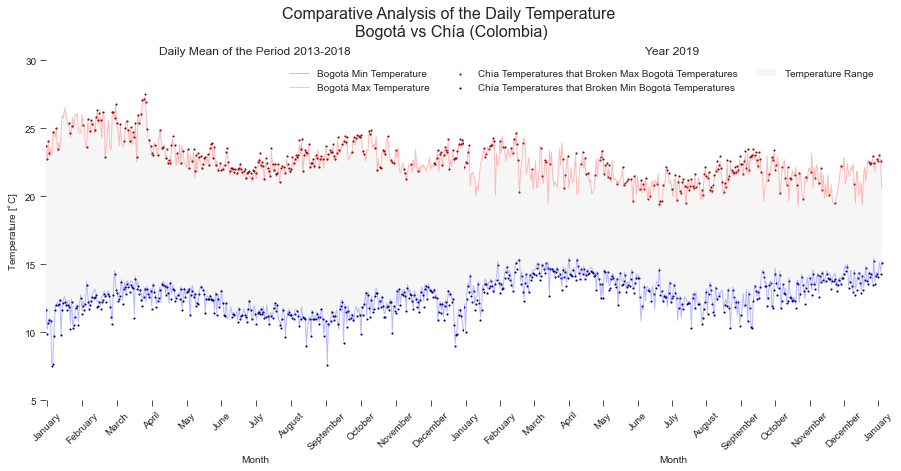

In [36]:
# Create data plot

dates = [*range(366)]
dates1 = [*range(365)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))
fig.subplots_adjust(hspace=0.1, wspace=0)
fig.suptitle('Comparative Analysis of the Daily Temperature \nBogotá vs Chía (Colombia)', size=16)

Bogota5yMax.plot(ax=axes[0], linewidth=1, color='red', alpha=0.25, label = 'Bogotá Max Temperature')
Bogota5yMin.plot(ax=axes[0], linewidth=1, color='blue', alpha=0.25, label = 'Bogotá Min Temperature')
axes[0].fill_between(dates, Bogota5yMin, Bogota5yMax, facecolor='lightgrey'
                 , alpha=0.2)
axes[0].scatter(dates, Chia5yMaxA, label = 'Chía Max Temperature', s=5, marker='.', color='darkred')
axes[0].scatter(dates, Chia5yMinA, label = 'Chía Min Temperature', s=5, marker='.', color='darkblue')

axes[0].set_ylim(bottom=5 , top=30)
axes[0].set_xticks([*range(1,366,30)])
axes[0].set_xticklabels(pd.date_range(start ='2000-01-01', end ='2001-02-01', freq ='M').strftime('%B'))
axes[0].set_xlim(left=0,right=360)
axes[0].xaxis.set_tick_params(rotation=45)
axes[0].set_title('Daily Mean of the Period 2013-2018')
axes[0].set_ylabel('Temperature [$^{\circ}$C]')
axes[0].set_xlabel('Month')
# remove the frame of the chart
for spine in axes[0].spines.values():
    spine.set_visible(False)

Bogota19Min.plot(ax=axes[1], linewidth=1, color='blue', alpha=0.25, label='Bogotá Min Temperature')
Bogota19Max.plot(ax=axes[1], linewidth=1, color='red', alpha=0.25, label='Bogotá Max Temperature')
axes[1].scatter(dates1, Chia19MaxA, label = 'Chía Temperatures that Broken Max Bogotá Temperatures', s=5, marker='.', color='darkred')
axes[1].scatter(dates1, Chia19MinA, label = 'Chía Temperatures that Broken Min Bogotá Temperatures', s=5, marker='.', color='darkblue')
axes[1].fill_between(dates1, Bogota19Min, Bogota19Max, facecolor='lightgrey'
                 , alpha=0.2, label='Temperature Range')

axes[1].set_ylim(bottom=5 , top=30)
axes[1].yaxis.tick_right()
axes[1].set_yticks([])
axes[1].set_xlabel('Month')
axes[1].yaxis.set_tick_params(tick2On=False)
axes[1].set_xticks([*range(1,366,30)])
axes[1].set_xticklabels(pd.date_range(start ='2000-01-01', end ='2001-02-01', freq ='M').strftime('%B'))
axes[1].set_xlim(left=0,right=365)
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].set_title('Year 2019 ')
# remove the frame of the chart
for spine in axes[1].spines.values():
    spine.set_visible(False)
axes[1].legend(ncol=3,loc='upper right')
plt.subplots_adjust(bottom=0.25)
plt.savefig('TemperaturesBogota.png', dpi=500);
